Laik Ruetten

lruetten

## Section 1: Question 5 a)

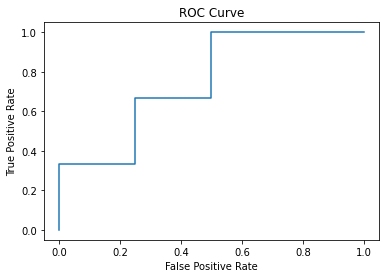

In [1]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

yhat = [0.95, 0.85, 0.8, 0.7, 0.55, 0.45, 0.4, 0.3, 0.2, 0.1]
y = [1,       1,   0,   1,    1,    0,   1,   1,   0,   0]

fpr, tpr, threshold = metrics.roc_curve(y, yhat)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.plot(fpr,tpr)

## Section 2

In [2]:
import sys
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

## 1)

In [3]:
# This work was done in Google colab
# File input looks like this

# Input D2z.txt
from google.colab import drive

drive.mount('/content/drive')
with open('/content/drive/My Drive/Colab Notebooks/D2z.txt', 'r') as f:
  temp = np.genfromtxt(f,delimiter=' ')

Mounted at /content/drive


In [4]:
X = temp[:, :-1]
y = temp[:, -1]

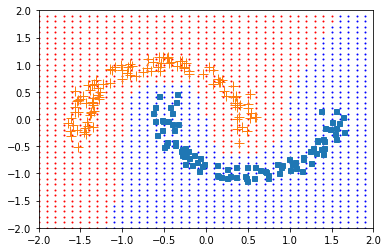

In [5]:
# Create 1NN classifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X, y)

# Predictions of 1NN on a 2D grid [-1 : 0.1 : 2]^2
prediction = [[], []]
for i in np.round(np.arange(-2, 2, 0.1), 1):
  for j in np.round(np.arange(-2, 2, 0.1), 1):
    prediction[int(neigh.predict([[i,j]]))].append([i,j])

# Plot predictions
prediction[0] = np.array(prediction[0])
prediction[1] = np.array(prediction[1])
plt.plot(prediction[0].T[0], prediction[0].T[1], 'bo', markersize=1)
plt.plot(prediction[1].T[0], prediction[1].T[1], 'ro', markersize=1)

X0 = np.array([X[i] for i in range(0, len(X)) if not y[i]])
X1 = np.array([X[i] for i in range(0, len(X)) if y[i]])

plt.plot(X0.T[0], X0.T[1], 's', markersize=5)
plt.plot(X1.T[0], X1.T[1], '+', markersize=10)

plt.axis([-2, 2, -2, 2])
plt.show()

## 2)

In [6]:
# Input emails.csv
from google.colab import drive

drive.mount('/content/drive')
with open('/content/drive/My Drive/Colab Notebooks/emails.csv', 'r') as f:
  temp = np.genfromtxt(f,delimiter=',')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Set up the folds (I just did it manually to not worry about bugs in loops)
Xy = temp[1:, 1:]

X = Xy[:, :-1]
y = Xy[:, -1]

X_train = X[:4000]
y_train = y[:4000]
X_test = X[4000:]
y_test = y[4000:]

X_fold1 = X[:1000]
X_fold2 = X[1000:2000]
X_fold3 = X[2000:3000]
X_fold4 = X[3000:4000]
X_fold5 = X[4000:]
y_fold1 = y[:1000]
y_fold2 = y[1000:2000]
y_fold3 = y[2000:3000]
y_fold4 = y[3000:4000]
y_fold5 = y[4000:]

X_fold1_train = np.concatenate((X_fold2, X_fold3, X_fold4, X_fold5))
X_fold2_train = np.concatenate((X_fold1, X_fold3, X_fold4, X_fold5))
X_fold3_train = np.concatenate((X_fold1, X_fold2, X_fold4, X_fold5))
X_fold4_train = np.concatenate((X_fold1, X_fold2, X_fold3, X_fold5))
X_fold5_train = np.concatenate((X_fold1, X_fold2, X_fold3, X_fold4))
y_fold1_train = np.concatenate((y_fold2, y_fold3, y_fold4, y_fold5))
y_fold2_train = np.concatenate((y_fold1, y_fold3, y_fold4, y_fold5))
y_fold3_train = np.concatenate((y_fold1, y_fold2, y_fold4, y_fold5))
y_fold4_train = np.concatenate((y_fold1, y_fold2, y_fold3, y_fold5))
y_fold5_train = np.concatenate((y_fold1, y_fold2, y_fold3, y_fold4))

folds = [(X_fold1, y_fold1, X_fold1_train, y_fold1_train), \
         (X_fold2, y_fold2, X_fold2_train, y_fold2_train), \
         (X_fold3, y_fold3, X_fold3_train, y_fold3_train), \
         (X_fold4, y_fold4, X_fold4_train, y_fold4_train), \
         (X_fold5, y_fold5, X_fold5_train, y_fold5_train)]

In [18]:
# 1NN classifier
# X_test - test data
# y_test - test labels
# X_train - train data
# y_train - train labels
# returns - confusion matrix of form [[TP, FP], [FN, TN]]
def one_N_N(X_test, y_test, X_train, y_train):
  confusion_matrix = [[0, 0],[0, 0]]
  # For each point i in the test set
  for (xi, yi) in zip(X_test, y_test):
    nearest_distance = sys.maxsize
    nearest_neighbor_class = -1
    # compare it to every point j in the training set
    for (xj, yj) in zip(X_train, y_train):
      # via euclidian distance
      dist = np.linalg.norm(xi - xj)
      
      # return the class of the nearest neighbor
      if dist < nearest_distance:
        nearest_distance = dist
        nearest_neighbor_class = yj

    # True Positive
    if yi and nearest_neighbor_class:
      confusion_matrix[0][0] = confusion_matrix[0][0] + 1
    # False Positive
    elif not yi and nearest_neighbor_class:
      confusion_matrix[0][1] = confusion_matrix[0][1] + 1
    # False Negative
    elif yi and not nearest_neighbor_class:
      confusion_matrix[1][0] = confusion_matrix[1][0] + 1
    # True Negative
    elif not yi and not nearest_neighbor_class:
      confusion_matrix[1][1] = confusion_matrix[1][1] + 1
  
  return confusion_matrix

In [9]:
# returns accuracy, precision, and recall
def get_metrics(confusion_matrix):
  [[TP, FP], [FN, TN]] = confusion_matrix
  accuracy = (TP + TN) / (TP + FP + FN + TN)
  precision = TP / (TP + FP)
  recall = TP / (TP + FN)
  return accuracy, precision, recall

In [ ]:
print(get_metrics(one_N_N(X_fold1, y_fold1, X_fold1_train, y_fold1_train)))
print(get_metrics(one_N_N(X_fold2, y_fold2, X_fold2_train, y_fold2_train)))
print(get_metrics(one_N_N(X_fold3, y_fold3, X_fold3_train, y_fold3_train)))
print(get_metrics(one_N_N(X_fold4, y_fold4, X_fold4_train, y_fold4_train)))
print(get_metrics(one_N_N(X_fold5, y_fold5, X_fold5_train, y_fold5_train)))

(accuracy, precision, recall) \\
(0.825, 0.6544943820224719, 0.8175438596491228) \\
(0.853, 0.6857142857142857, 0.8664259927797834) \\
(0.862, 0.7212121212121212, 0.8380281690140845) \\
(0.851, 0.7164179104477612, 0.8163265306122449) \\
(0.775, 0.6057441253263708, 0.7581699346405228)

## 3)

In [11]:
# Logistic regression
# X_test - test data
# y_test - test labels
# X_train - train data
# y_train - train labels
# returns - confusion matrix of form [[TP, FP], [FN, TN]]
def logistic_regression(X_test, y_test, X_train, y_train):
  confusion_matrix = [[0, 0],[0, 0]]
  X = X_train
  y = y_train

  # Make a column of ones for the intercept weight
  intercept = np.ones((X.shape[0], 1))
  X = np.concatenate((intercept, X), axis=1)
  y = y.reshape(-1, 1)

  # randomly initialize weights
  w = np.random.rand(len(X[0])).reshape(-1, 1)

  # Iterations of gradient descent
  α = 0.01
  iterations = 5000 
  for _ in range(iterations):
    p = 1 / (1 + np.exp(-np.dot(X, w)))
    w = w - α * np.dot(X.T, (p - y)) / len(X)
  
  # Test
  X = X_test
  y = y_test
  intercept = np.ones((X.shape[0], 1))
  X = np.concatenate((intercept, X), axis=1)
  y = y.reshape(-1, 1)
  p = 1 / (1 + np.exp(-np.dot(X, w)))
  p = p.round()

  for i in range(0, len(y)):
    # True Positive
    if y[i] and p[i]:
      confusion_matrix[0][0] = confusion_matrix[0][0] + 1
    # False Positive
    elif not y[i] and p[i]:
      confusion_matrix[0][1] = confusion_matrix[0][1] + 1
    # False Negative
    elif y[i] and not p[i]:
      confusion_matrix[1][0] = confusion_matrix[1][0] + 1
    # True Negative
    elif not y[i] and not p[i]:
      confusion_matrix[1][1] = confusion_matrix[1][1] + 1

  return confusion_matrix

In [ ]:
print(get_metrics(logistic_regression(X_fold1, y_fold1, X_fold1_train, y_fold1_train)))
print(get_metrics(logistic_regression(X_fold2, y_fold2, X_fold2_train, y_fold2_train)))
print(get_metrics(logistic_regression(X_fold3, y_fold3, X_fold3_train, y_fold3_train)))
print(get_metrics(logistic_regression(X_fold4, y_fold4, X_fold4_train, y_fold4_train)))
print(get_metrics(logistic_regression(X_fold5, y_fold5, X_fold5_train, y_fold5_train)))

(accuracy, precision, recall) \\
(0.899, 0.9220183486238532, 0.7052631578947368) \\
(0.917, 0.8566176470588235, 0.8411552346570397) \\
(0.904, 0.8852459016393442, 0.7605633802816901) \\
(0.897, 0.8031746031746032, 0.8605442176870748) \\
(0.863, 0.7665615141955836, 0.7941176470588235)


## 4)

In [12]:
# k - number of neighbors
# fold - (X_test, y_test, X_train, y_train)
# X_test - test data
# y_test - test labels
# X_train - train data
# y_train - train labels
# returns - confusion matrix of form [[TP, FP], [FN, TN]]
def kNN(k, fold):
  X_test, y_test, X_train, y_train = fold
  confusion_matrix = [[0, 0],[0, 0]]
  neigh = KNeighborsClassifier(n_neighbors=k)
  neigh.fit(X_train, y_train)
  prediction = neigh.predict(X_test)

  for i in range(0, len(X_test)):
    # True Positive
    if y_test[i] and prediction[i]:
      confusion_matrix[0][0] = confusion_matrix[0][0] + 1
    # False Positive
    elif not y_test[i] and prediction[i]:
      confusion_matrix[0][1] = confusion_matrix[0][1] + 1
    # False Negative
    elif y_test[i] and not prediction[i]:
      confusion_matrix[1][0] = confusion_matrix[1][0] + 1
    # True Negative
    elif not y_test[i] and not prediction[i]:
      confusion_matrix[1][1] = confusion_matrix[1][1] + 1
  
  return confusion_matrix

In [13]:
for k in (1, 3, 5, 7, 10):
  i = 0
  fold_accuracies = []
  for fold in folds:
    (acc, prec, recall) = get_metrics(kNN(k, fold))
    print('k=',k,'fold=',i,'acc,prec,recall=', (acc, prec, recall))
    fold_accuracies.append(acc)
    i = i + 1
  print('avg_acc=', sum(fold_accuracies)/5)
    

k= 1 fold= 0 acc,prec,recall= (0.825, 0.6544943820224719, 0.8175438596491228)
k= 1 fold= 1 acc,prec,recall= (0.853, 0.6857142857142857, 0.8664259927797834)
k= 1 fold= 2 acc,prec,recall= (0.862, 0.7212121212121212, 0.8380281690140845)
k= 1 fold= 3 acc,prec,recall= (0.851, 0.7164179104477612, 0.8163265306122449)
k= 1 fold= 4 acc,prec,recall= (0.775, 0.6057441253263708, 0.7581699346405228)
avg_acc= 0.8332
k= 3 fold= 0 acc,prec,recall= (0.847, 0.680327868852459, 0.8736842105263158)
k= 3 fold= 1 acc,prec,recall= (0.851, 0.6975308641975309, 0.8158844765342961)
k= 3 fold= 2 acc,prec,recall= (0.859, 0.7227414330218068, 0.8169014084507042)
k= 3 fold= 3 acc,prec,recall= (0.88, 0.7788461538461539, 0.826530612244898)
k= 3 fold= 4 acc,prec,recall= (0.774, 0.6086956521739131, 0.7320261437908496)
avg_acc= 0.8422000000000001
k= 5 fold= 0 acc,prec,recall= (0.837, 0.6685082872928176, 0.8491228070175438)
k= 5 fold= 1 acc,prec,recall= (0.85, 0.7068403908794788, 0.7833935018050542)
k= 5 fold= 2 acc,prec,re

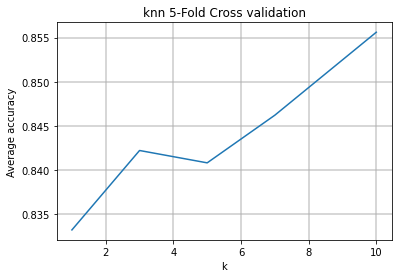

In [14]:
k = [1, 3, 5, 7, 10]
avg_acc = [0.8332, 0.8422, 0.8408, 0.8462, 0.8556]

plt.plot(k, avg_acc)
plt.title('knn 5-Fold Cross validation')
plt.grid(alpha=0.5, linestyle='-', linewidth=2)
plt.xlabel('k')
plt.ylabel('Average accuracy')
plt.show()


## 5)

In [15]:
X_train = X[:4000]
y_train = y[:4000]
X_test = X[4000:]
y_test = y[4000:]

confusion_matrix = [[0, 0],[0, 0]]
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)
prediction = neigh.predict(X_test)

for i in range(0, len(X_test)):
  # True Positive
  if y_test[i] and prediction[i]:
    confusion_matrix[0][0] = confusion_matrix[0][0] + 1
  # False Positive
  elif not y_test[i] and prediction[i]:
    confusion_matrix[0][1] = confusion_matrix[0][1] + 1
  # False Negative
  elif y_test[i] and not prediction[i]:
    confusion_matrix[1][0] = confusion_matrix[1][0] + 1
  # True Negative
  elif not y_test[i] and not prediction[i]:
    confusion_matrix[1][1] = confusion_matrix[1][1] + 1

knn_confustion_matrix = confusion_matrix
print(knn_confustion_matrix)

[[229, 144], [77, 550]]


In [16]:
from sklearn.linear_model import LogisticRegression

X_train = X[:4000]
y_train = y[:4000]
X_test = X[4000:]
y_test = y[4000:]

confusion_matrix = [[0, 0],[0, 0]]
logreg = LogisticRegression(random_state=0, max_iter=300)
logreg.fit(X_train, y_train)
prediction = logreg.predict(X_test)

for i in range(0, len(X_test)):
  # True Positive
  if y_test[i] and prediction[i]:
    confusion_matrix[0][0] = confusion_matrix[0][0] + 1
  # False Positive
  elif not y_test[i] and prediction[i]:
    confusion_matrix[0][1] = confusion_matrix[0][1] + 1
  # False Negative
  elif y_test[i] and not prediction[i]:
    confusion_matrix[1][0] = confusion_matrix[1][0] + 1
  # True Negative
  elif not y_test[i] and not prediction[i]:
    confusion_matrix[1][1] = confusion_matrix[1][1] + 1

logreg_confustion_matrix = confusion_matrix
print(logreg_confustion_matrix)

[[283, 31], [23, 663]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


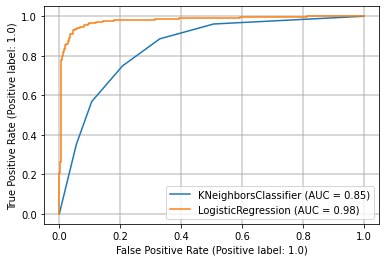

In [17]:
from sklearn import metrics

neigh_ROC = metrics.plot_roc_curve(neigh, X_test, y_test)
logreg_ROC = metrics.plot_roc_curve(logreg, X_test, y_test, ax=neigh_ROC.ax_)
plt.grid(alpha=0.5, linestyle='-', linewidth=2)
plt.show()